In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


###### Cambiar TotalCharges a numeric

In [4]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce') # errors='coerce' will replace the error with NaN

###### Manejo de datos nulos

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Como son pocos datos, es viable optar por una eliminación de estos. Estos mismos ocasionaban que TotalCharges fuera Dtype object

In [7]:
df.dropna(inplace=True)

Eliminar columna Id la cual es irrelevante para el modelo

In [9]:
df.drop('customerID', axis=1, inplace=True)

###### Convertir a numérico variable objetivo

In [10]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [11]:
# Another option
# df.Churn.replace('Yes', 1, inplace=True)
# df.Churn.replace('No', 0, inplace=True)

df.Churn = df.Churn.apply(lambda x: 1 if x == 'Yes' else 0)

In [14]:
df.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [47]:
df_prep = df.copy()

##### Manejo de variables categóricas

In [48]:
df_prep = pd.get_dummies(df_prep)
df_prep.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [22]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


##### Analisis de correlación

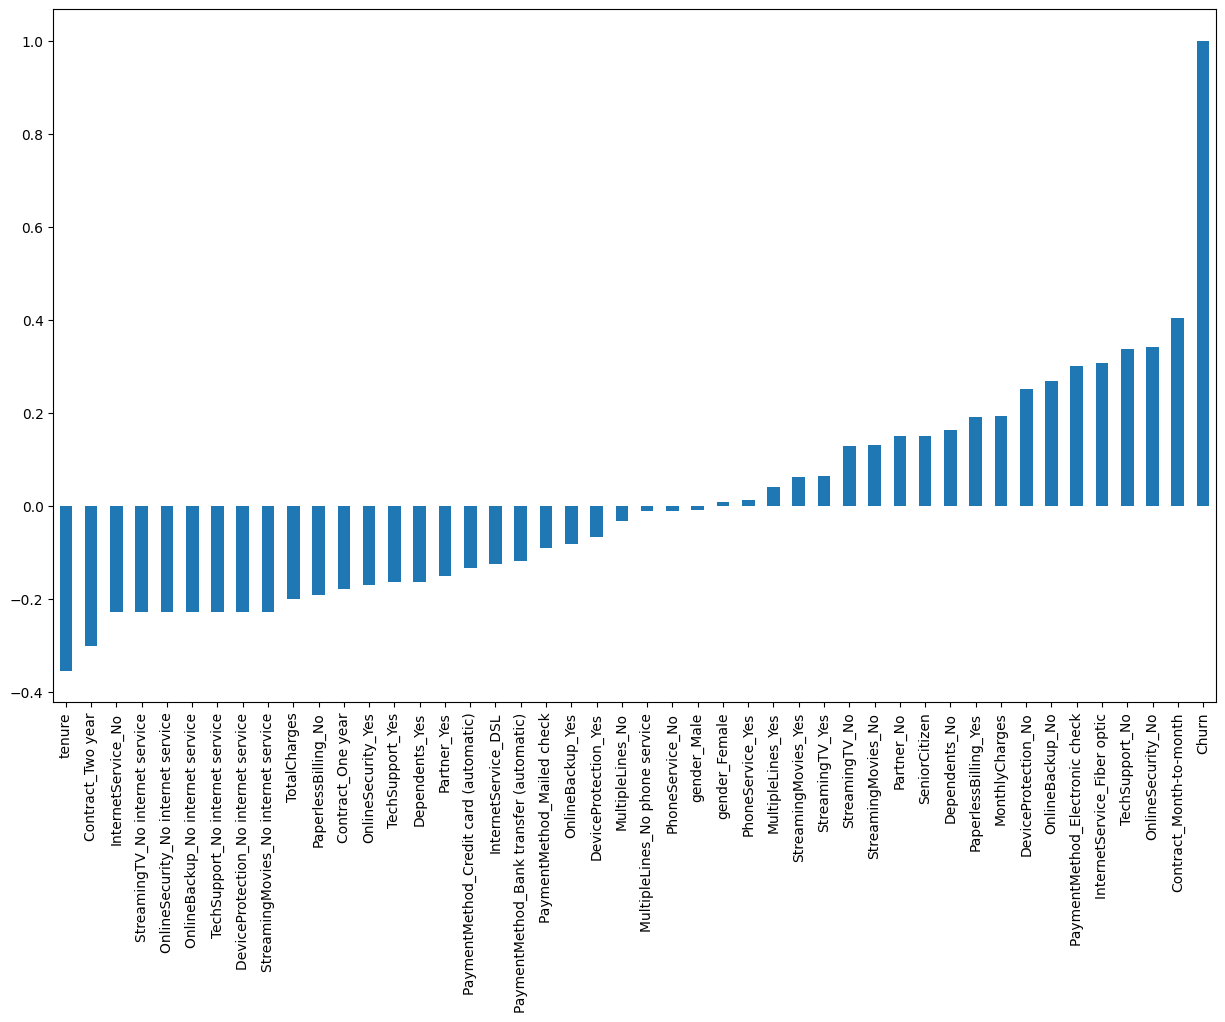

In [39]:
fig = plt.figure(figsize=(15,9))
df_prep.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

##### Escalabilidad de los datos

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_prep)

In [51]:
df_scaled = pd.DataFrame(df_scaled, columns=df_prep.columns)
df_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


EDA

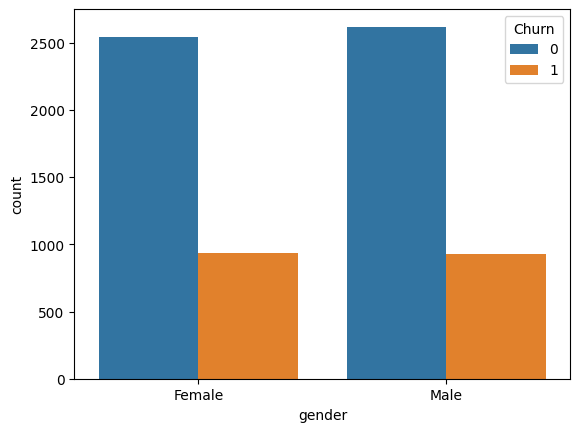

In [52]:
sns.countplot(x='gender', data=df, hue='Churn')
plt.show()

In [70]:
def plot_categorical(col_name):
    fig = plt.figure(figsize=(10,10))
    ax = sns.countplot(x=col_name, data=df, hue='Churn')
    plt.show()

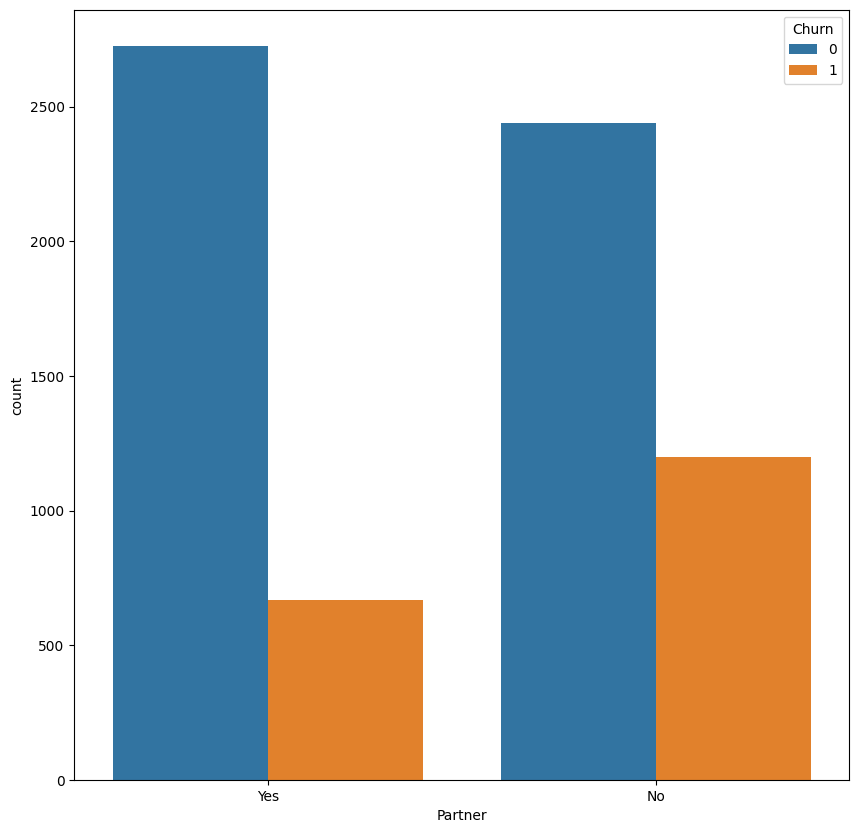

In [71]:
plot_categorical('Partner')

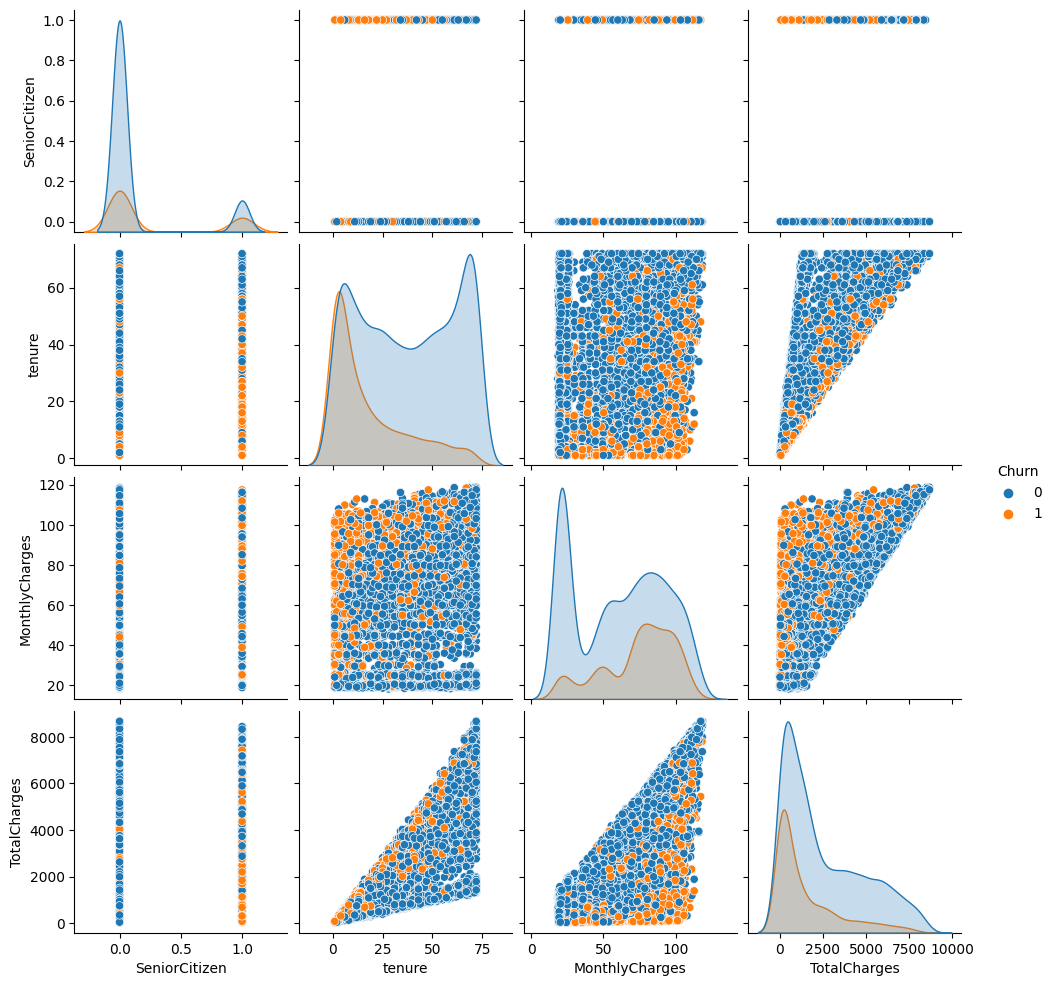

In [81]:
sns.pairplot(data = df, hue='Churn')
plt.show()

##### Entrenamiento del modelo de regresión logística binomial

In [82]:
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn'].values

In [85]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [90]:
x_test.shape

(2110, 45)

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
model = LogisticRegression()
model.fit(x_train, y_train)

c:\Users\Santiago\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [94]:
from sklearn import metrics
prediction_test = model.predict(x_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.795734597156398


##### Evaluación del modelo

Probabilidad de que el dato sea 0 a la izquierda y pbdad de que sea 1 a la derecha

In [95]:
model.predict_proba(x_test)

array([[0.99021183, 0.00978817],
       [0.86177511, 0.13822489],
       [0.30193071, 0.69806929],
       ...,
       [0.99028272, 0.00971728],
       [0.70132412, 0.29867588],
       [0.8286526 , 0.1713474 ]])

In [96]:
model.coef_

array([[ 2.16455757e-01, -3.10072224e+00, -1.62260312e-01,
         1.19637147e+00,  9.33904149e-04, -2.24831187e-02,
        -7.15002220e-02,  4.99510074e-02,  1.16803828e-01,
        -1.38353043e-01,  8.51113833e-02, -1.06660598e-01,
        -1.58856437e-01,  8.51113833e-02,  5.21958391e-02,
        -4.17811428e-01,  5.11402394e-01, -1.15140181e-01,
         2.40088555e-01, -1.15140181e-01, -1.46497589e-01,
         8.40744383e-02, -1.15140181e-01,  9.51652790e-03,
         5.65171525e-02, -1.15140181e-01,  3.70738138e-02,
         2.20213847e-01, -1.15140181e-01, -1.26622881e-01,
        -8.59225188e-02, -1.15140181e-01,  1.79513485e-01,
        -8.76648490e-02, -1.15140181e-01,  1.81255815e-01,
         7.42704019e-01, -9.75399949e-02, -6.66713239e-01,
        -1.13994723e-01,  9.24455083e-02, -2.72800419e-03,
        -1.58701392e-01,  2.16922724e-01, -7.70425428e-02]])

In [97]:
model.feature_names_in_

array(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two y

AxesSubplot(0.125,0.11;0.775x0.77)


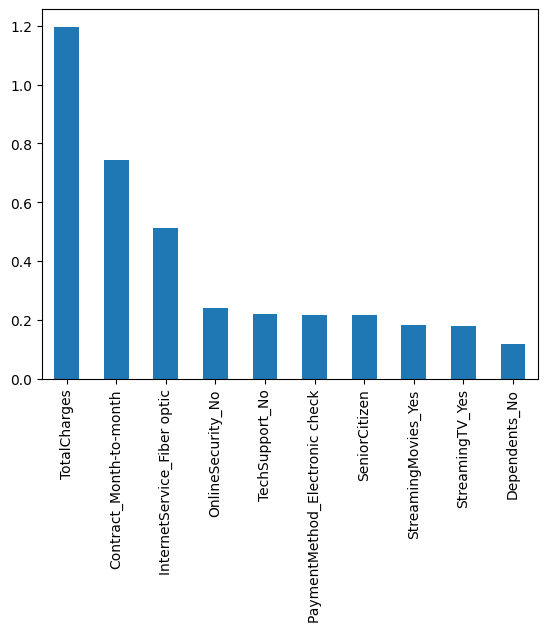

In [99]:
weights = pd.Series(model.coef_[0], index=x_train.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.11;0.775x0.77)


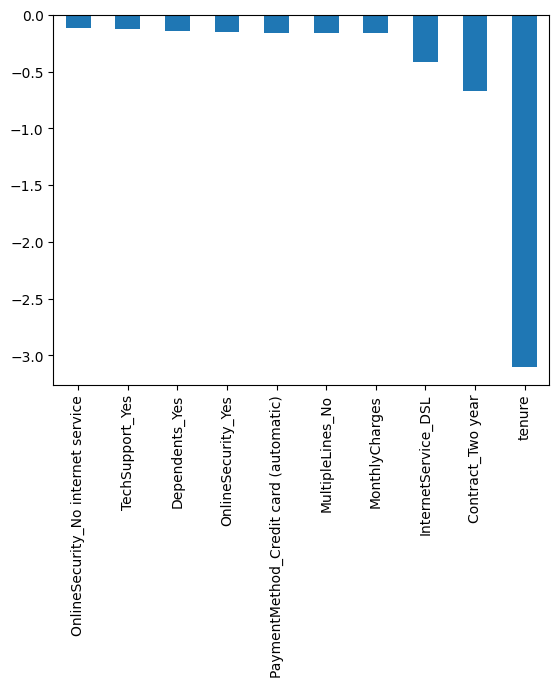

In [101]:
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [103]:
from sklearn.metrics import confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

<Figure size 1000x1000 with 0 Axes>

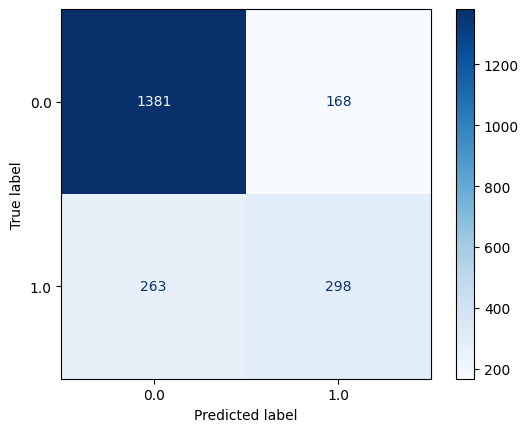

In [104]:
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, prediction_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()

Se puede obtener un mejor accuracy si balanceamos el df, pues hay una amplia diferencia entre ceros y unos